new code specific for our usecase

In [5]:
import drawSvg as draw
from drawSvg.widgets import DrawingWidget
from hyperbolic import euclid, util
from hyperbolic.poincare.shapes import *
from hyperbolic.poincare import Transform
import hyperbolic.poincare.shapes as hyper  # pip3 install hyperbolic

delta=0.3
click_list=[]
lineStyle2 = dict(stroke_width=0.01, stroke='white', fill='none' #,stroke_dasharray='.02,.02'
                 )

# Create drawing
d = draw.Drawing(2.2, 2.2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))
g=draw.Group()
d.append(g)


def draw_delta_neigbourhood_twosides(points,delta):
    for i,x in enumerate(points):
        p1=hyper.Point.fromEuclid(x[0],x[1])
        g.draw(hyper.Circle.fromCenterRadius(p1, delta), fill='green',fill_opacity=1)
        for y in points[i+1:]:
            if i==0:
                p2=hyper.Point.fromEuclid(y[0],y[1])
                line = hyper.Line.fromPoints(*p1, *p2, segment=True)
                g.draw(line, hwidth=2*delta, fill='green',fill_opacity=1)
                
def draw_thin_triangle(points):
    for i,x in enumerate(points):
        for y in points[i+1:]:
            p1=hyper.Point.fromEuclid(x[0],x[1])
            p2=hyper.Point.fromEuclid(y[0],y[1])
            line=Line.fromPoints(*p1,*p2,segment=True)
            g.draw(line, **lineStyle2)
def draw_thick_line(points):
    for i,x in enumerate(points):
        for y in points[i+1:]:
            p1=hyper.Point.fromEuclid(x[0],x[1])
            p2=hyper.Point.fromEuclid(y[0],y[1])
            line=hyper.Line.fromPoints(*p1,*p2,segment=True)
            g.draw(line, hwidth=0.4,fill='red')
    
def redraw_Mousepoint(points):
    for i,x in enumerate(points):
        p=hyper.Point.fromEuclid(x[0],x[1])
        g.draw(hyper.Circle.fromCenterRadius(p,0.02),fill='white')
        
def shift(seq, shift=1):
    perm=shift%3 
    return seq[-perm:] + seq[:-perm]

clicks=0
        
widget = DrawingWidget(d)
@widget.mousedown
def mousedown(widget, x, y, info):
        global clicks
        clicks+=1
        if (x**2 + y**2) ** 0.5 + 2e-10 < 1:
            if clicks<3:
                click_list.append((x, y))
            elif clicks==3:
                click_list.append((x,y))
                g.children.clear()
                draw_delta_neigbourhood_twosides(click_list,delta)
                draw_thin_triangle(click_list)
            else:
                g.children.clear()
                draw_delta_neigbourhood_twosides(shift(click_list,clicks),delta)
                draw_thin_triangle(shift(click_list,clicks))
        widget.refresh()
        
        
@widget.mousemove
def mousemove(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 2e-10 < 1:
        if len(click_list)<3:
            g.children.clear()
            draw_thin_triangle(click_list + [(x, y)])
            redraw_Mousepoint([(x,y)])
    widget.refresh()
    
draw_thick_line([(0.5,0.4),(-0.2,-0.3)])
widget

DrawingWidget()

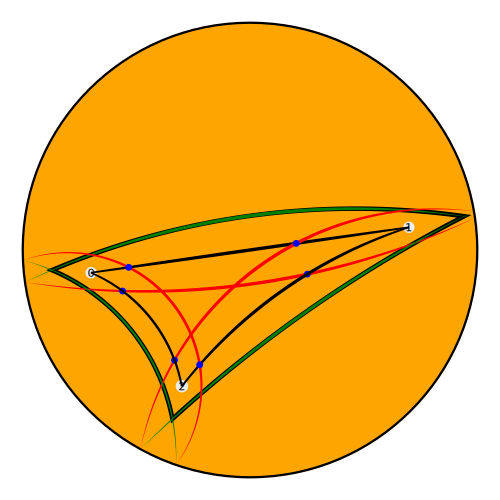

In [82]:
import drawSvg as draw
import math
from constructions import deltaLines_of_Line,is_on_Linesegment,ips_with_deltaneigbourhood
from hyperbolic import util
from hyperbolic.euclid import intersection
from hyperbolic.euclid.shapes import  Arc, Line as ELine, OriginLine, Circle
from hyperbolic.poincare.shapes import *
from Triangle import Triangle

delta=0.3

d = draw.Drawing(2.2, 2.2, origin='center')


d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))

p1=Point.fromEuclid(-0.7,-0.1)
p2=Point.fromEuclid(0.7,0.1)
p3=Point.fromEuclid(-0.3,-0.6)
PList=[p1,p2,p3]
#print(PList)

Tri=Polygon.fromVertices(PList)
deltaTri=Tri.offsetPolygon(delta)
SList=Tri.edges


for i,v in enumerate(PList):
    d.draw(v, hradius=0.1, fill='#eee')
    d.draw(draw.Text(str(i), 0.05, *v, center=0.7))
'''
for l in SList:
    d.draw(l, hwidth=0.03)
    d.draw(Hypercycle.fromHypercycleOffset(l,delta),hwidth=0.03, fill='green')
    d.draw(Hypercycle.fromHypercycleOffset(l,-delta),hwidth=0.03, fill='red')
'''
d.draw(deltaTri, stroke_width=0.02, stroke='black', fill='none')

for i,l in enumerate(SList):
    d.draw(l, hwidth=0.03)
    d.draw(Hypercycle.fromHypercycleOffset(l,delta),hwidth=0.03, fill='green')
    d.draw(Hypercycle.fromHypercycleOffset(l,-delta),hwidth=0.03, fill='red')
    RestList = SList[:i] + SList[i+1:]
    for y in RestList:
        for h in deltaLines_of_Line(l,delta):
            ip=y.intersectionsWithHcycle(h)
            for p in ip:
                if is_on_Linesegment(*p,y):
                    d.draw(p, radius=0.015, fill='blue')

d

not our own code but something to work with...

found on https://pypi.org/project/drawSvg/


In [6]:
import drawSvg as draw
from drawSvg.widgets import DrawingWidget
import hyperbolic.poincare.shapes as hyper  # pip3 install hyperbolic

# Create drawing
d = draw.Drawing(2, 2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange'))
group = draw.Group()
d.append(group)

# Update the drawing based on user input
click_list = []
def redraw(points):
    group.children.clear()
    for x1, y1 in points:
        for x2, y2 in points:
            if (x1, y1) == (x2, y2): continue
            p1 = hyper.Point.fromEuclid(x1, y1)
            p2 = hyper.Point.fromEuclid(x2, y2)
            if p1.distanceTo(p2) <= 1e9:
                line = hyper.Line.fromPoints(*p1, *p2, segment=True)
                group.draw(line, hwidth=0.1, fill='white')
    for x, y in points:
        p = hyper.Point.fromEuclid(x, y)
        group.draw(hyper.Circle.fromCenterRadius(p, 0.05), fill='green')
redraw(click_list)

# Create interactive widget and register mouse events
widget = DrawingWidget(d)
@widget.mousedown
def mousedown(widget, x, y, info):
        if (x**2 + y**2) ** 0.5 + 1e-5 < 1:
            if len(click_list)<3:
                click_list.append((x, y))
        redraw(click_list)
        widget.refresh()
        
        
@widget.mousemove
def mousemove(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 1e-5 < 1:
        if len(click_list)<3:
            redraw(click_list + [(x, y)])
    widget.refresh()
widget

DrawingWidget()